Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Loading and Preprocessing

In [6]:
data = pd.read_csv('Housing.csv')

# Quick look at data
print("\n Dataset Preview:")
print(data.head())


# Check for missing values
print("\n Missing Values Check:")
print(data.isnull().sum())

# dropping/filling null values
data = data.dropna()

# Define Features (X) and Target (y)
features = ['area', 'bedrooms']  
target = 'price'

X = data[features]
y = data[target]


X = data[features]
y = data[target]


 Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

 Missing Values Check:
price               0
area                0
bedrooms    

Splitting Test and Train sets, and training model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n Training Samples: {X_train.shape[0]}")
print(f" Testing Samples: {X_test.shape[0]}")

model = LinearRegression()
model.fit(X_train, y_train)

print("\n Model trained successfully.")



 Training Samples: 436
 Testing Samples: 109

 Model trained successfully.


Making predictions and evaluating the model

In [13]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"R-squared Score (R²)      : {r2:.2f}")


 Model Evaluation Metrics:
Mean Absolute Error (MAE) : 1381158.90
Mean Squared Error (MSE)  : 3280176595474.01
R-squared Score (R²)      : 0.35


View model parameters and plotting results


 Model Parameters:
Intercept: 642086.4086518651
Coefficients: [('area', np.float64(389.22573013133035)), ('bedrooms', np.float64(695678.6670515896))]


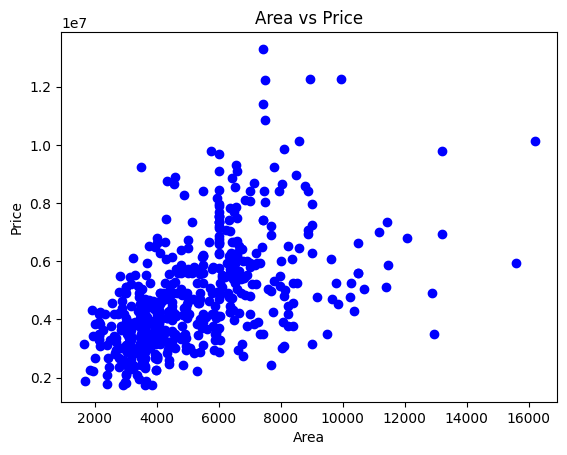

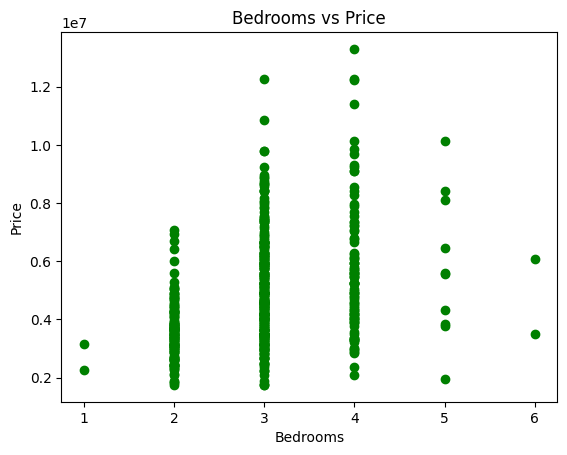

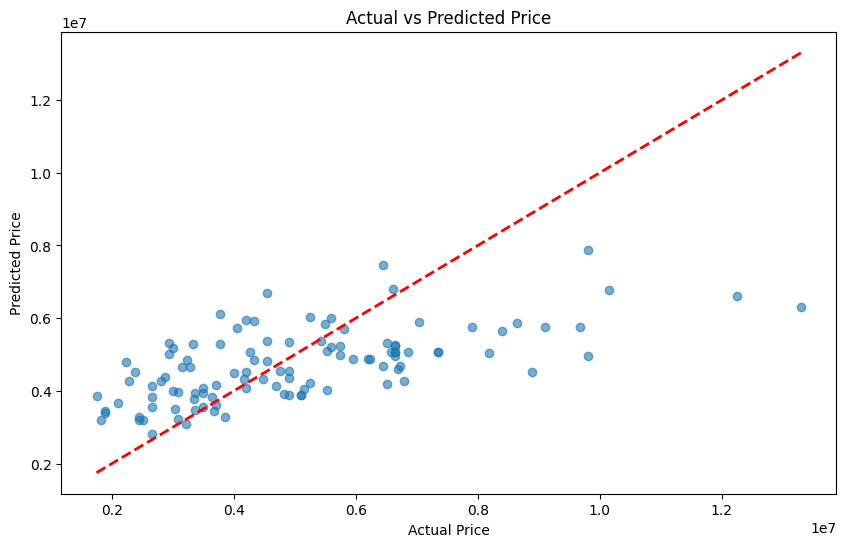

In [16]:
print("\n Model Parameters:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {list(zip(features, model.coef_))}")

# --- Scatter Plot 1 ---
plt.scatter(X['area'], y, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

# --- Scatter Plot 2 ---
plt.scatter(X['bedrooms'], y, color='green')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()

# Plotting Actual vs Predicted values for Multiple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()